# GPS data processing

<div style="background-color:black;color:white;padding:20px;">
<p>M. I. Pedro José Correa Caicedo</p>
</div>

#### 1) Import library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 2) Functions for calculations:

##### a) Distance traveled  [m]:

<img src="./images/haver.png" alt="haversine" width="500" height="500" />

##### Fig.1 Distance between two GPS points.

The Haversines equation, to calculate distances between points on the surface of a sphere: 

$d=2*r*\sin^{-1}(\sqrt[2]{\sin^{2}(\frac{lat_2-lat_1}{2})+\cos(lat_1)*\cos(lat_2)*\sin^{2}(\frac{lon_2-lon_1}{2})}) $    (1)

Where the radius of the earth r= 6371 [km]; lat y lon in [°]

d in [km], to have the distance in meters:

$d=1000*d$      (2)

Ref: Sinnott, R. W. (1984). Virtues of the Haversine. Sky and Telescope, 68(2), 159

##### b) Speed  [m/s]:

La $Speed=\frac{Distance}{time}=\frac{d}{1} \frac{[m]}{[s]}$ (3)

The Pmod GPS sensor has an update rate of 1 [s] that is, each calculated distance has a:
dt=1 [S]. 

To have the speed in  [Km/h]:

$vel_{kmh}=d*\frac{3600}{1000} \frac{[Km]}{[h]}$   (4)

Now, to regain speed in [m] / [s] from speed [Km]/[h]:

$vel_{m}=vel_{kmh}* \frac{5}{18} \frac{[m]}{[s]}$   (5)


##### c) Steering angle [°]:

<img src="./images/angulo_pen.png" alt="angulo" width="500" height="500" />

###### Fig.2 Slope analysis to calculate the steering angle. 

To calculate the angle  $\theta$ between one GPS point (Latitude, Longitude) and the next. First, the slope of the line between the two points must be determined: 

$m=\frac{y2-y1}{x2-x1}$  (6),  con x1, x2: latitude e y1, y2: longitude.

As seen in Fig. 2  a) y b),for positive and negative slopes, the angle is defined by equation (7): 

$\theta=\tan^{-1}(m)  [rad] $   (7)

For the cases observed in Fig. 2 c) and d), the indeterminacies of the tangent must be considered. 
To calculate the angle, the following auxiliary cases are defined: 

$\theta=-\cos^{-1}(\frac{(x2-x1)}{\sqrt{(y2-y1)^{2}+(x2-x1)^{2}}})$    (8), when x2<x1 y y2<y1

$\theta=\cos^{-1}(\frac{(x2-x1)}{\sqrt{(y2-y1)^{2}+(x2-x1)^{2}}})$    (9), for any others

In [2]:
def Dis_Vel_AN_GPS(x1,x2,y1,y2):

    #distance
    dlat = np.radians(x1-x2)
    dlon = np.radians(y1-y2)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(x1))* np.cos(np.radians(x1)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = 1000*r_t*c

    #Steering angle
    if(x2>x1 and y2>y1):       
        teta=np.arctan((y2-y1)/(x2-x1))
    elif(x2>x1 and y2<y1):###
        teta=np.arctan((y2-y1)/(x2-x1))
    elif(x2<x1 and y2>y1):
        teta=np.arccos((x2-x1)/(np.sqrt((y2-y1)**2+(x2-x1)**2)))
    elif(x2<x1 and y2<y1):###
        teta=-np.arccos((x2-x1)/(np.sqrt((y2-y1)**2+(x2-x1)**2)))
    else:
        teta=np.arccos((x2-x1)/(np.sqrt((y2-y1)**2+(x2-x1)**2)))
        
    teta=round(teta,4)

    #Speed in Km/h
    velgps=(d)*(3600/1000)
    #Speed in Km/h
    velgps_m=velgps*(5/18)

    return  d,velgps,velgps_m,teta



#### 3) Load data:

In [3]:
df=pd.read_csv('data_GPS.csv')
#print(df.head())

#features:
r=df['route']
lat=df['lat sensor']
lon=df['lon sensor']
# number of routes
Nr=len(r.unique())
print(Nr)
##vector to save:
latv=[]
lonv=[]
dv=[]
velkmv=[]
velmv=[]
tetav=[]

# Earth radius 
r_t=6371 #km
#delta 
dt=1 #seconds
L=1.70 #meters

1


#### 4) Save data in lists of lists:

In [4]:
#traverse data for each path and save them in lists 
for nr in range(Nr):
    ##build the list of lists 
    latv.append([])
    lonv.append([])
    for ru in range(len(r)):
        if(r[ru]=='r'+str(nr+1)):
            latv[nr].append(lat[ru])
            lonv[nr].append(lon[ru])

print(len(latv[0]))

474


#### 5) Calculation of: Distance, speed and turning angle:

In [5]:
for recu in range(len(latv)): #route
    dv.append([])
    velkmv.append([])
    velmv.append([])
    tetav.append([])
    #print(recu)
    dis=0
    for id_s in range(len(latv[recu])):#sensor data
        try:
            x1=latv[recu][id_s]
            x2=latv[recu][id_s+1]
            y1=lonv[recu][id_s]
            y2=lonv[recu][id_s+1]
            
        except:
            continue

        d,velgps,velgps_m,teta=Dis_Vel_AN_GPS(x1,x2,y1,y2)
        #distance
        dis=dis+d
        dv[recu].append(dis)
        #speed Km/h
        velkmv[recu].append(velgps)
        #Speed m/h
        velmv[recu].append(velgps_m)
        #Steering angle
        tetav[recu].append(np.degrees(teta))


#### 6) Graphics: 

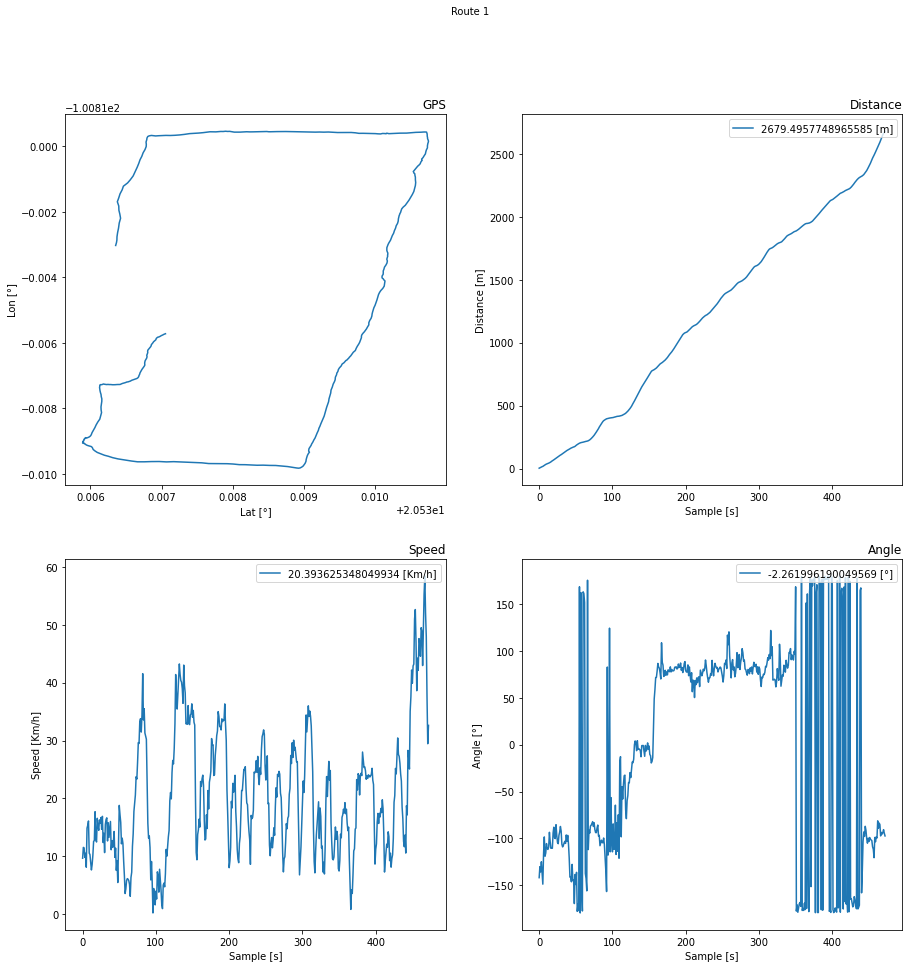

In [6]:
#######Plots######################
for pnr in range(Nr):
    fig, ax = plt.subplots(2,2)
    fig.suptitle('Route'+' '+str(pnr+1),fontsize=10)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax[0,0].plot(latv[pnr],lonv[pnr])
    ax[0,0].set_title('GPS',loc='right')
    ax[0,0].set(xlabel='Lat [°]', ylabel='Lon [°]')

    ax[0,1].plot(dv[pnr],label=str(max(dv[pnr]))+' '+'[m]')
    ax[0,1].set_title('Distance',loc='right')
    ax[0,1].set(xlabel='Sample [s]', ylabel='Distance [m]')
    ax[0,1].legend(loc="upper right")

    ax[1,0].plot(velkmv[pnr],label=str(np.mean(velkmv[pnr]))+' '+'[Km/h]')
    ax[1,0].set_title('Speed',loc='right')
    ax[1,0].set(xlabel='Sample [s]', ylabel='Speed [Km/h]')
    ax[1,0].legend(loc="upper right")

    ax[1,1].plot(tetav[pnr],label=str(np.mean(tetav[pnr]))+' '+'[°]')
    ax[1,1].set_title('Angle',loc='right')
    ax[1,1].set(xlabel='Sample [s]', ylabel='Angle [°]')
    ax[1,1].legend(loc="upper right")
    break

plt.show()

##### 7)Simple kinematic model of a car (bicycle): 

<img src="./images/modelbike.png" alt="carro" width="700" height="500"/>

###### Fig. 3 Bicycle kinematic model. a) Rear GPS, b) Central GPS, c) Front GPS.

##### a)  rear GPS

$xr=V*\cos(\theta)*dt$

$yr=V*\sin(\theta)*dt$

$\theta=\frac{V*\tan{\delta}}{L}*dt$

##### b)  Central GPS

$xc=V*\cos(\theta+\beta)*dt$

$yc=V*\sin(\theta+\beta)*dt$

$\theta=\frac{V*\cos{\beta}*\tan{\delta}}{L}*dt$

$\delta=\varphi*dt$

##### c) Front GPS 

$xf=V*\cos(\theta+\delta)*dt$

$yf=V*\sin(\theta+\delta)*dt$

$\theta=\frac{V*\sin{\delta}}{L}*dt$

Ref: https://www.coursera.org/lecture/intro-self-driving-cars/lesson-2-the-kinematic-bicycle-model-Bi8yE


#### a) Vehicle model function: 

In [7]:
####Vehicle model function: 
def modelcar(v,teta):
    delta=np.arctan((L*teta)/(v*dt))# vel[m/s], L[m], x e y [°], dt[s]= delta[rad],teta[rad]
    x=dt*v*np.cos(teta) 
    y=dt*v*np.sin(teta)
    return x,y,delta

#### b) Relative position:

In [8]:
########################################################
##simulation model car#################
xcal=[]
ycal=[]
for rut in range(Nr):
    xcal.append([])
    ycal.append([])
    xgar=np.zeros(len(tetav[rut])+1)
    ygar=np.zeros(len(tetav[rut])+1)
    anwlgar=np.zeros(len(tetav[rut])+1)
    
    for j in range(len(velmv[rut])):      
        #try:
        ## velocidad 
        vel=velmv[rut][j]
        ## angulo
        an=np.radians(tetav[rut][j])

        ##x,y calculate
        xg,yg,anwlg=modelcar(vel,an)
        ###llenar arrays
        ygar[j+1]=ygar[j]+yg
        xgar[j+1]=xgar[j]+xg

        xcal[rut].append(xgar[j])
        ycal[rut].append(ygar[j])
            
        #except:
            #continue

#### c) Graphics:

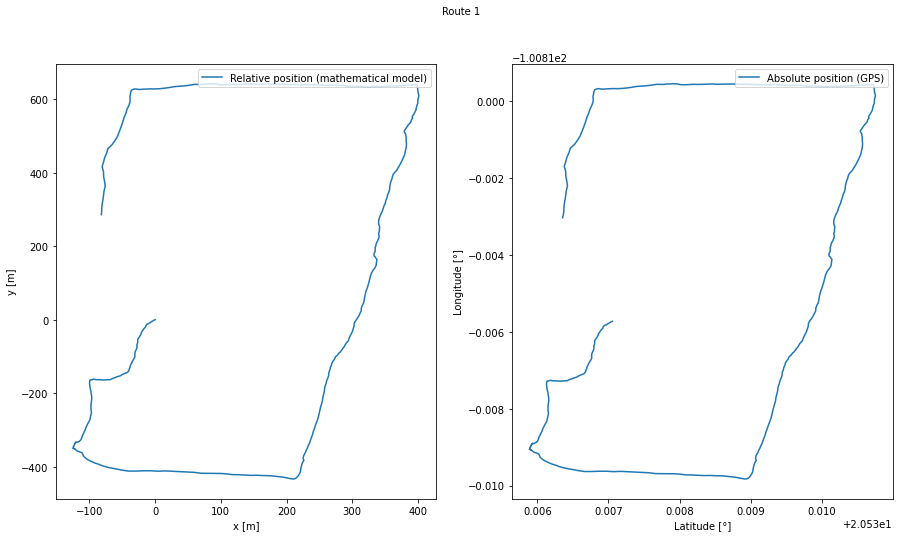

In [9]:
for gr in range(Nr):
    fig, ax = plt.subplots(1,2)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    fig.suptitle('Route'+' '+str(gr+1),fontsize=10)
    ax[0].plot(xcal[gr],ycal[gr],label="Relative position (mathematical model)")
    ax[0].set(xlabel='x [m]', ylabel='y [m]')
    ax[0].legend(loc="upper right")
    
    ax[1].plot(latv[gr],lonv[gr],label="Absolute position (GPS)")
    ax[1].set(xlabel='Latitude [°]', ylabel='Longitude [°]')
    ax[1].legend(loc="upper right")
    
plt.show()

#############

#### d) Map:

In [10]:
import folium

In [11]:
#create map and initial point
map_cel = folium.Map(width=600,height=500, location=[latv[0][0],lonv[0][0]], zoom_start=15)
#form numpy array with data lists 
lata=np.array(latv[0])
lona=np.array(lonv[0])

#transpose of the total vector [lat, lon] 
route=np.array([lata,lona]).T

print(np.shape(route))
print(route)
#feature f1 is created 
f1=folium.FeatureGroup("Route 1")
f2=folium.FeatureGroup("Start")
f3=folium.FeatureGroup("End")

(474, 2)
[[  20.537055   -100.8157245 ]
 [  20.5370355  -100.8157398 ]
 [  20.53701617 -100.8157627 ]
 [  20.536995   -100.8157833 ]
 [  20.53698033 -100.8158043 ]
 [  20.53696067 -100.815823  ]
 [  20.536943   -100.8158337 ]
 [  20.5369255  -100.8158687 ]
 [  20.5369195  -100.8159092 ]
 [  20.536899   -100.8159462 ]
 [  20.536887   -100.8159713 ]
 [  20.53687967 -100.8159977 ]
 [  20.53687133 -100.8160197 ]
 [  20.53686383 -100.8160385 ]
 [  20.53685633 -100.81606   ]
 [  20.53685467 -100.8160872 ]
 [  20.536847   -100.8161198 ]
 [  20.53683517 -100.8161513 ]
 [  20.536819   -100.8161953 ]
 [  20.536807   -100.8162273 ]
 [  20.5368045  -100.8162605 ]
 [  20.536806   -100.8163047 ]
 [  20.53679933 -100.8163447 ]
 [  20.5367925  -100.8163827 ]
 [  20.536796   -100.816426  ]
 [  20.53679133 -100.8164677 ]
 [  20.53678033 -100.8165107 ]
 [  20.53676983 -100.8165482 ]
 [  20.53676467 -100.816593  ]
 [  20.53676283 -100.816626  ]
 [  20.5367646  -100.8166633 ]
 [  20.5367635  -100.8166917 ]

In [12]:
# the line type layer is created with the route matrix and added to the f1 characteristic 
folium.vector_layers.PolyLine(route,popup='<b>Ruta 1</b>', tooltip='Car',color='black',weight=8).add_to(f1)
folium.Marker([latv[0][0],lonv[0][0]], popup="<i>Start</i>", tooltip='Start',icon=folium.Icon(color="green", icon="info-sign")).add_to(f2)
folium.Marker([latv[0][-1],lonv[0][-1]], popup="<i>End</i>", tooltip='End',icon=folium.Icon(color="red", icon="info-sign")).add_to(f3)

#the feature (containing the line layer) is added to the map.   
f1.add_to(map_cel)
f2.add_to(map_cel)
f3.add_to(map_cel)

#add interactive icon to the map 
folium.LayerControl().add_to(map_cel)
map_cel.save('map_cel.html')

In [13]:
map_cel